# Clustering

In [46]:
#Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch


In [47]:
from matplotlib.colors import ListedColormap

#Custom colors
custom_colors = ['#a7308f', '#e233bc','#ff65c3', '#ff9ecc', '#ffc3e2']

#Creating a colormap from the list of colors
custom_cmap = ListedColormap(custom_colors)

### K-Means

In [48]:
#Loading my dataset
data = pd.read_csv('game_details_with_counts.csv')

#Selecting quantitative columns for PCA
quant_data = data[['min_players', 'max_players', 'min_playtime', 'max_playtime', 
                   'min_age', 'users_rated', 'average_rating', 'category_count', 
                   'mechanic_count']] 

#Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(quant_data)

#Performing PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(normalized_data)

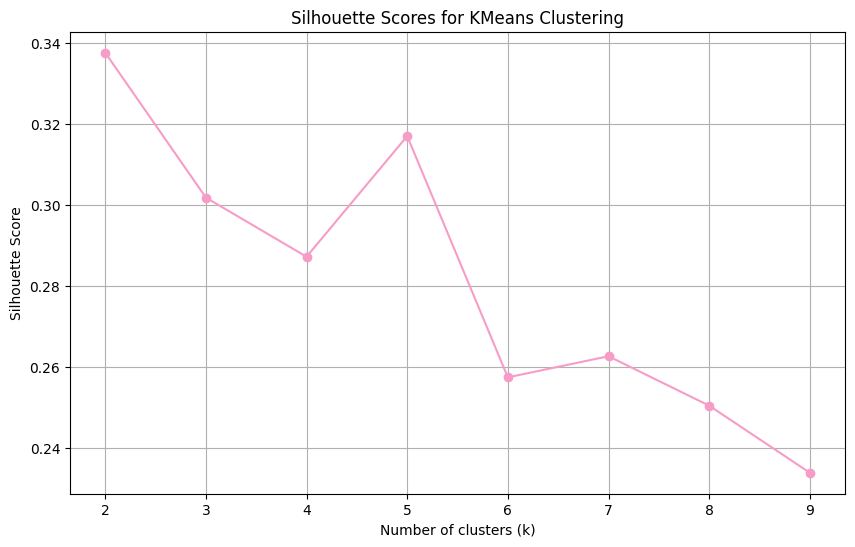

<Figure size 640x480 with 0 Axes>

In [49]:
#KMeans Clustering with Silhouette Method
silhouette_scores = []
k_values = range(2, 10)  # Choose a range for k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_result)
    score = silhouette_score(pca_result, kmeans.labels_)
    silhouette_scores.append(score)

#Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='#f79cc7')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#saving the plot
plt.savefig('silhouette_scores.png')


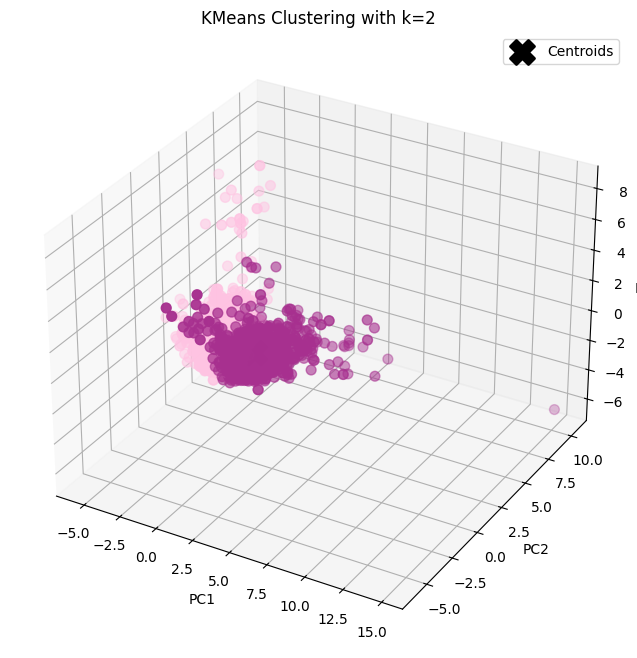

<Figure size 640x480 with 0 Axes>

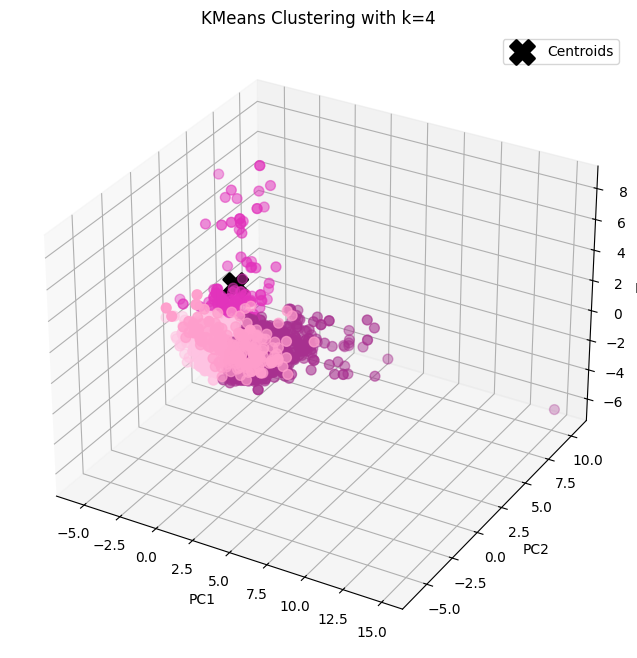

<Figure size 640x480 with 0 Axes>

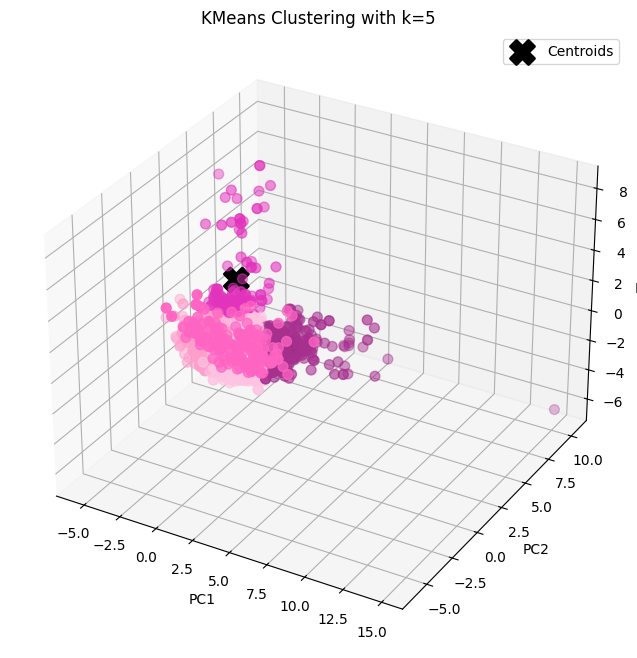

<Figure size 640x480 with 0 Axes>

In [50]:
#Choosing three smart values of k from the silhouette score plot
chosen_k_values = [2, 4, 5] 


#Plotting KMeans Clustering Results
for k in chosen_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    centroids = kmeans.cluster_centers_

    #Creating a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
               c=kmeans.labels_, cmap=custom_cmap, s=50)
    
    #Plotting centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
               c='black', marker='X', s=300, edgecolor='black', linewidths=2, alpha=1.0, label='Centroids')
    
    ax.set_title(f'KMeans Clustering with k={k}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.legend()
    plt.show()

    #Saving the plot
    plt.savefig(f'kmeans_clusters_{k}.png')
    


In [51]:
#Converting PCA results back to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])


### Hierarchial Clustering

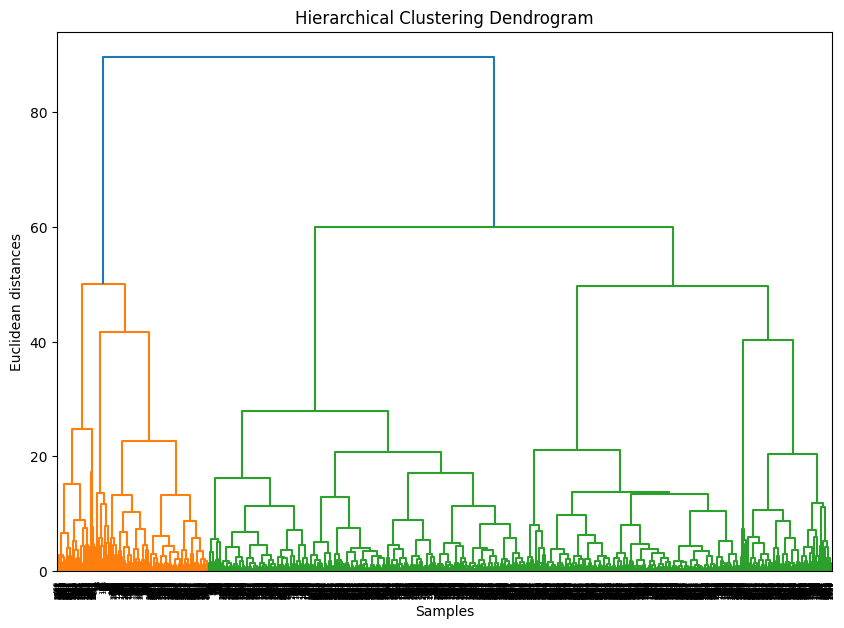

In [52]:
# Hierarchical Clustering with Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_result, method='ward'))
ax.set_facecolor('white')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')

plt.show()

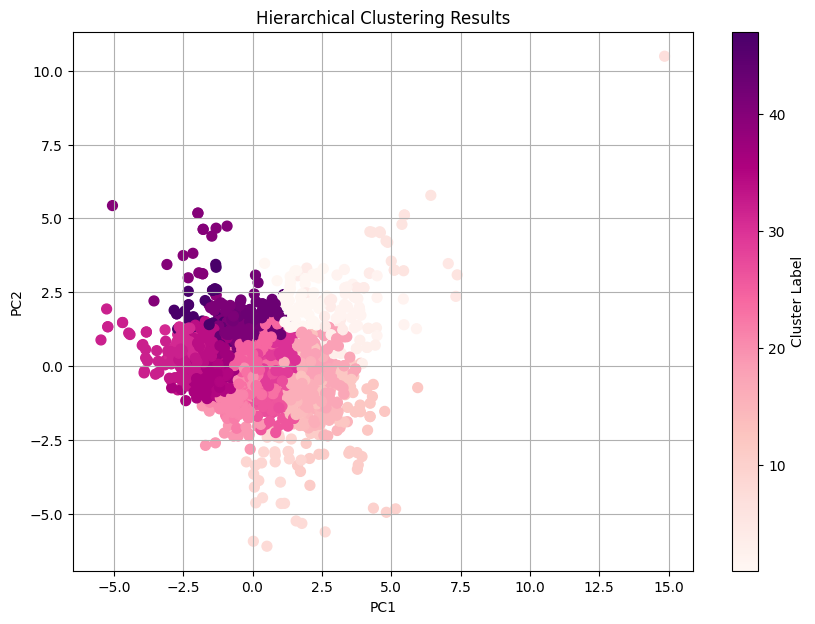

In [53]:
#Cutting the dendrogram to form clusters
max_d = 7  # Example threshold
clusters = sch.fcluster(sch.linkage(pca_result, method='ward'), max_d, criterion='distance')

#Plotting the hierarchical clustering results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, cmap='RdPu', s=50)
plt.title('Hierarchical Clustering Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

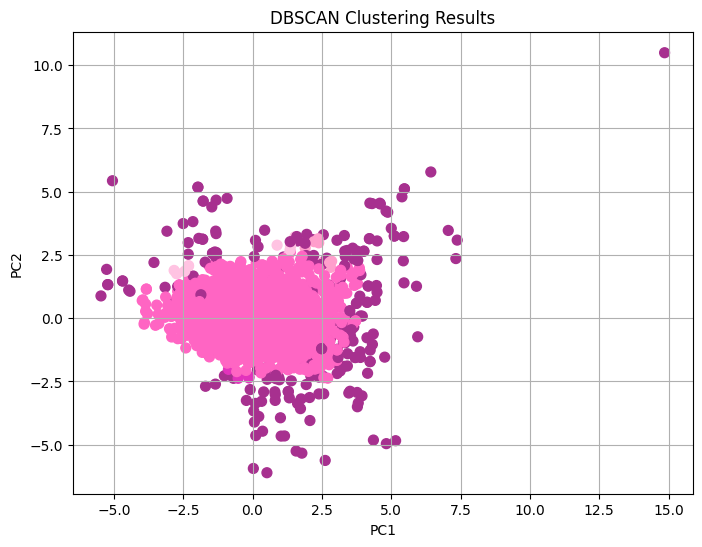

In [54]:
from sklearn.cluster import DBSCAN

#DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(pca_result)

#Plotting DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=dbscan_labels, cmap=custom_cmap, s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()



In [55]:
#Comparing DBSCAN with other methods
print("KMeans labels:", kmeans.labels_)
print("DBSCAN labels:", dbscan_labels)

KMeans labels: [2 2 2 ... 3 3 3]
DBSCAN labels: [-1 -1 -1 ...  3  3  3]
